# Simple CNN

## Solving Fashion-MNIST dataset through CNN

In this section, we try to solve the Fashion-MNIST via a CNN and compare it with an MLP network. 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

from random import randint

Using TensorFlow backend.


First, we normalize the input between 0 and 1. This will result in better and lower weights for the out network.

In [2]:
dataset = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0


print "x_train.shape =", x_train.shape
print "x_test.shape  =", x_test.shape


x_train.shape = (60000, 28, 28)
x_test.shape  = (10000, 28, 28)


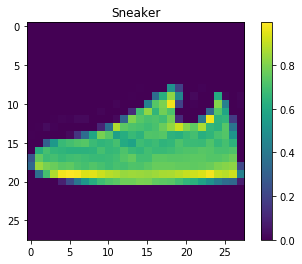

In [3]:
%matplotlib inline
def get_label_name(y):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    return class_names[y]

rnd_index = randint(0, x_train.shape[0]-1)
plt.imshow(x_train[rnd_index])
plt.title(get_label_name(y_train[rnd_index]))
plt.colorbar()
plt.show()

## MLP

Below we have a two-layered MLP network with 128 hidden units. The hidden units have the ReLU activation function. The reason for choosing ReLU the distribution of the input data which are between 0 and 1. The practical tests showed that ReLU works best with images. Another thing to note here is that we have used a 35% dropout connection rate for hidden units which made the performance of the network significantly higher.

In [4]:
model = Sequential()

model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.35))
model.add(Dense(10, activation='softmax'))

print 'Training...'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train,
    y_train, 
    epochs=45, 
    batch_size=128,
#     verbose=0,
    validation_data=(x_test, y_test)
)
print 'Training Finished!'

train_loss, train_acc = model.evaluate(x_train,  y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=0)

print ''
print 'Train accuracy:', train_acc
print 'Test accuracy:', test_acc

Training...
Train on 60000 samples, validate on 10000 samples
Epoch 1/45
60000/60000 [==============================] - 2s 33us/step - loss: 0.6439 - acc: 0.7763 - val_loss: 0.4698 - val_acc: 0.8343
Epoch 2/45
60000/60000 [==============================] - 2s 38us/step - loss: 0.4509 - acc: 0.8397 - val_loss: 0.4193 - val_acc: 0.8526
Epoch 3/45
60000/60000 [==============================] - 2s 36us/step - loss: 0.4088 - acc: 0.8542 - val_loss: 0.3955 - val_acc: 0.8577
Epoch 4/45
60000/60000 [==============================] - 2s 32us/step - loss: 0.3852 - acc: 0.8610 - val_loss: 0.3794 - val_acc: 0.8639
Epoch 5/45
60000/60000 [==============================] - 1s 25us/step - loss: 0.3658 - acc: 0.8682 - val_loss: 0.3611 - val_acc: 0.8709
Epoch 6/45
60000/60000 [==============================] - 3s 49us/step - loss: 0.3539 - acc: 0.8724 - val_loss: 0.3548 - val_acc: 0.8720
Epoch 7/45
60000/60000 [==============================] - 3s 47us/step - loss: 0.3432 - acc: 0.8742 - val_loss: 0.35

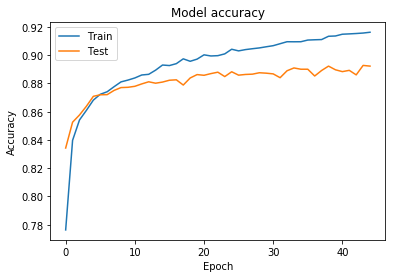

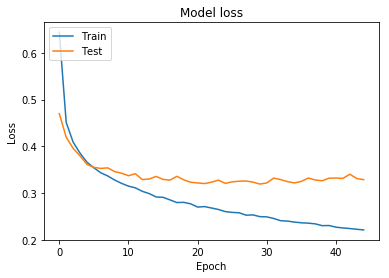

In [5]:
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


## CNN

Although the MLP worked very good accordingly, the results were not very satisfactory. The accuracy for the MLP as it was showed above was 88% on test which is very low. Thus, we tried to solve the problem with CNN. The network we have used consists of convolutional layers with 32 and 64 units, both have 3x3 kernel size and ReLU activation and both have a 30% dropout rate. Then, these layers are followed by 512 dense hidden units.

In [6]:
x_train_ch = np.reshape(x_train, (x_train.shape[0], 28, 28, 1))
x_test_ch = np.reshape(x_test, (x_test.shape[0], 28, 28, 1))

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.3))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Conv2D(48, (3, 3), activation='relu'))
# model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.3))
# model.add(Conv2D(128, (3, 3), activation='relu'))
# model.add(Dropout(0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))


print 'Training...'
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    x_train_ch,
    y_train, 
    epochs=40, 
    batch_size=128,
#     verbose=0,
    validation_data=(x_test_ch, y_test)
)
print 'Training Finished!'

train_loss, train_acc = model.evaluate(x_train_ch,  y_train, verbose=0)
test_loss, test_acc = model.evaluate(x_test_ch,  y_test, verbose=0)

print ''
print 'Train accuracy:', train_acc
print 'Test accuracy:', test_acc

Training...
Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 86s 1ms/step - loss: 0.5254 - acc: 0.8095 - val_loss: 0.4292 - val_acc: 0.8574
Epoch 2/40
60000/60000 [==============================] - 84s 1ms/step - loss: 0.3426 - acc: 0.8749 - val_loss: 0.3786 - val_acc: 0.8831
Epoch 3/40
60000/60000 [==============================] - 85s 1ms/step - loss: 0.3015 - acc: 0.8892 - val_loss: 0.3822 - val_acc: 0.8733
Epoch 4/40
60000/60000 [==============================] - 89s 1ms/step - loss: 0.2722 - acc: 0.8988 - val_loss: 0.3084 - val_acc: 0.8950
Epoch 5/40
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2522 - acc: 0.9059 - val_loss: 0.3072 - val_acc: 0.8966
Epoch 6/40
60000/60000 [==============================] - 74s 1ms/step - loss: 0.2350 - acc: 0.9123 - val_loss: 0.2751 - val_acc: 0.9088
Epoch 7/40
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2234 - acc: 0.9166 - val_loss: 0.27

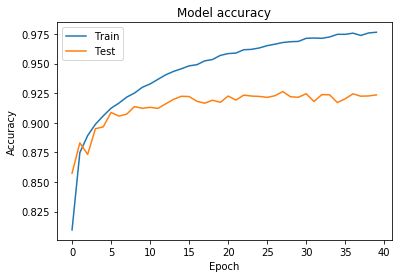

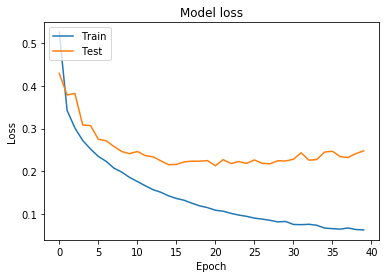

In [7]:
%matplotlib inline

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
